# Stereo Vision 

A stereo camera comes with two or more image sensors to simulate human binocular vision - giving it the ability to perceive depth.

The term **binocular vision** is used when two cameras are employed.

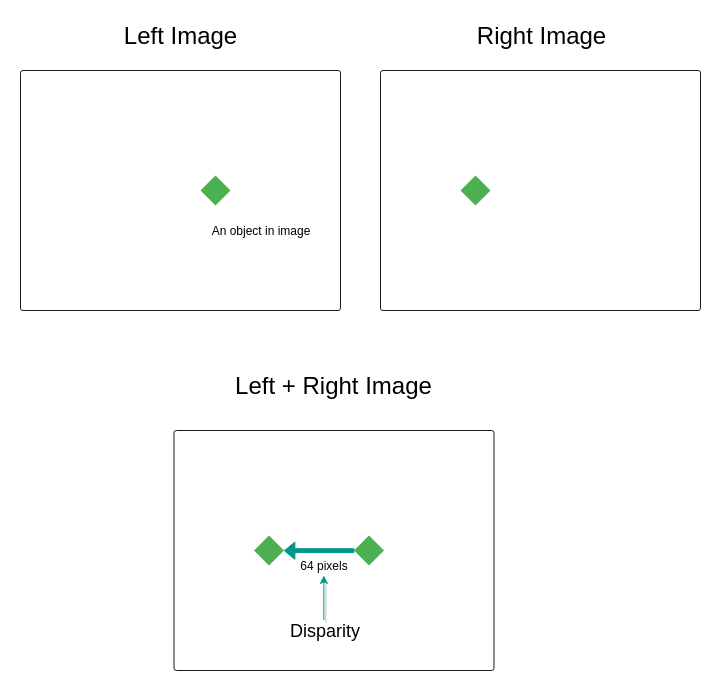

## Stereo setup and terminology

- **Fixation Point**: the point of intersection of the optical axis.
- **Baseline**: the distance between the centers of projection.
- **Epipolar Plane**: the plane passing through the centers of projection and the point in the scene.
- **Conjugate Pair**: any point in the scene that is visible in both cameras will be projected to a pair of image points in the two images. 
- **Disparity**: the distance between corresponding points when the two images are super-imposed.
- **Disparity Map**: the disparities of all point from the disparity map (can be displayed as an image).

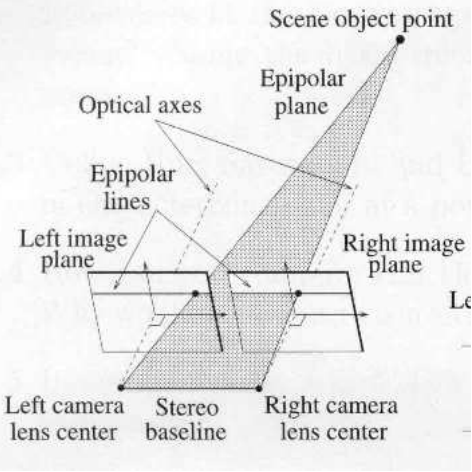

## Depth Perception Technologies :-

Capturing the third dimension can be done in many different ways, and each of the machine vision technologies available has its own pros and cons. 3D imaging can be broken into two main categories: **Passive and Active**, 

The main Passive techniques are:
- Depth from focus
- Light Field 
- Stereo

The main Active techniques are:
- Time-of-flight
- Structured light 
- interferometry
- Stereo

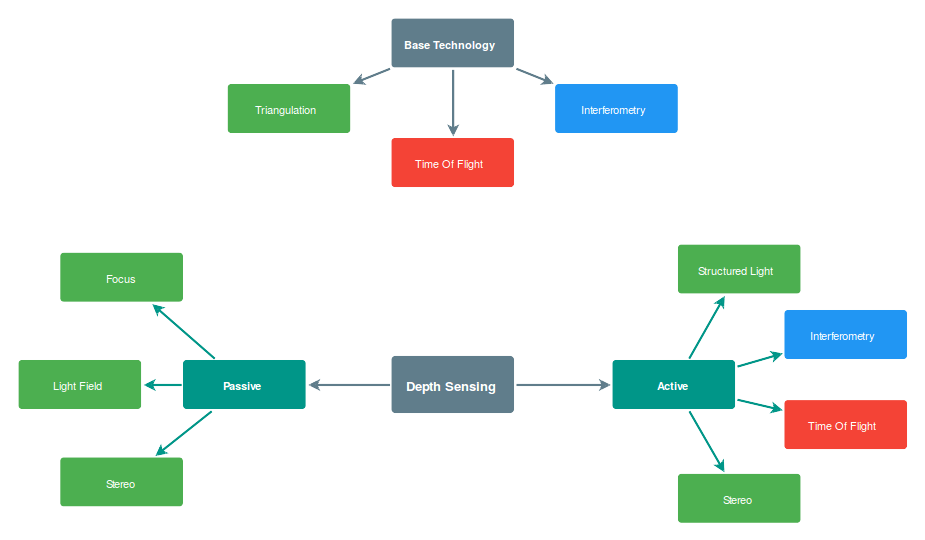

## Classification of Stereo Depth Perception

**1) Passive Stereo:**
The passive Stereo system depends on the available light in the environment and deosn't employ any kind of external light.

Passive stereo is suitable for well lighted textured regions and works well in sunlight.

***Pros:***
- Performs well in sunlight
- Cost Effective

***Cons:***
- Mediocre performance in low light
- Mediocre performance in non-textured scenes

**2) Active Stereo:**
The active stereo vision is a form of stereo vision which actively employs a light such as a laser or structured light to simplify the stereo matching problem. 

Active Stereo is useful in regions where there is a lack of light and/or texture. The infrared projector or another light source will flood the scene with texture thereby cutting off the dependency of an external light source. But along with its positive, there are some negatives such as active stereo will lose its effectivness in direct sunlight and in regions with a high interference of the same external light source technology used.

***Pros:***
- Performs well in low light.
- Performs well in the non-textured indoor scene.
- Can be used as a hybrid Time of flight and Stereo Triangulation depth-perceiving technology.

***Cons:***
- Under sunlight, it is same as passive stereo.
- Over long-range, it is same as passive stereo.
- IR projector adds to cost.

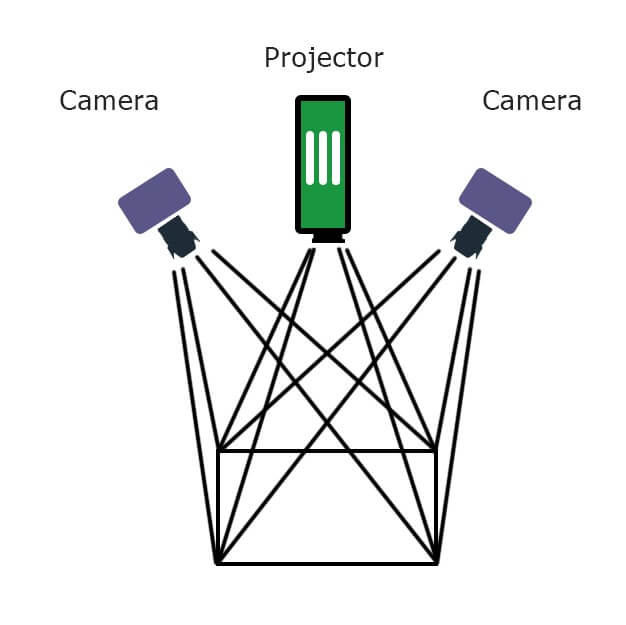

## Triangulation - the principle underlying stereo vision

- The 3D location of any visible object point in space is restricted to the passes through the center of projection and the projection of the object point. 
- Binocular stereo vision determines the position of a point in space by finding the intersetion of the two lines passing through the center of projection and the projection of the point in each image.

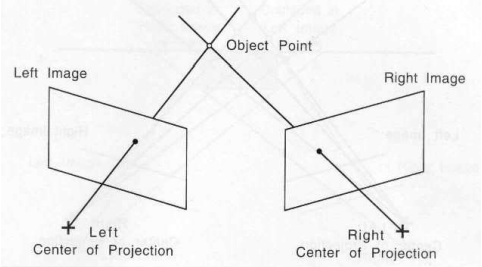

## The two problems of stereo:-

### 1) The correspondence problem:
- Finding pairs of matched points such that each point in the pair is the projection of the same 3D point.
- Triangulation depends crucially on the solution of the correspondence problem. 
- Ambiguous correspondence between points in the two images may lead to several different consistent interpretations of the scene.
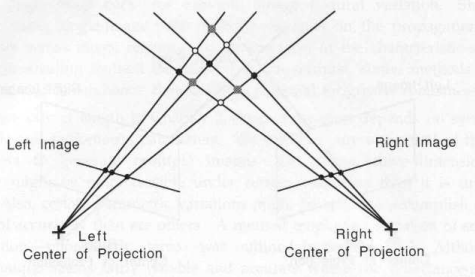

### 2) The reconstruction problem:
- Given the corresponding points, we can compute the disparity map.
- The disparity map can be converted to a 3D map of the scene (i.e., recover the 3D structure) if the stereo geometry is known.
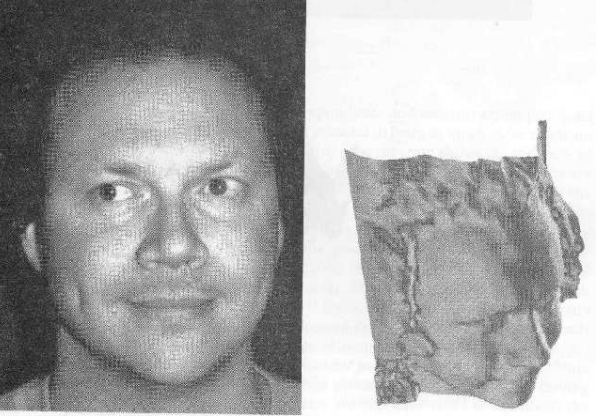

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [14]:
#Class for computing stereo correspondence using the block matching algorithm
stereo = cv2.StereoBM_create(numDisparities=0, blockSize=21)

In [2]:
# Example_1
left_image = cv2.imread('./images/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('./images/tsukuba_r.png', cv2.IMREAD_GRAYSCALE)

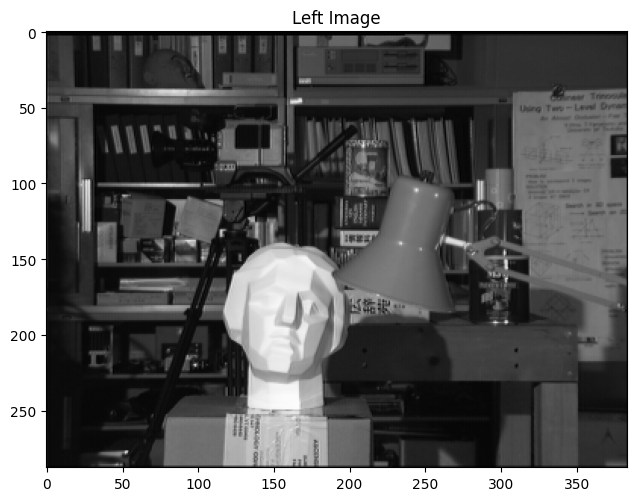

In [9]:
imshow('Left Image',left_image)

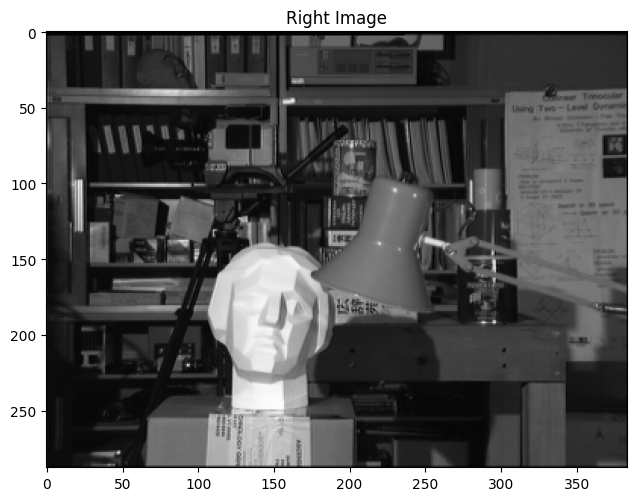

In [10]:
imshow('Right Image',right_image)

In [5]:
# For each pixel algorithm will find the best disparity from 0
# Larger block size implies smoother, though less accurate disparity map
depth = stereo.compute(left_image, right_image)
print(depth)

[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


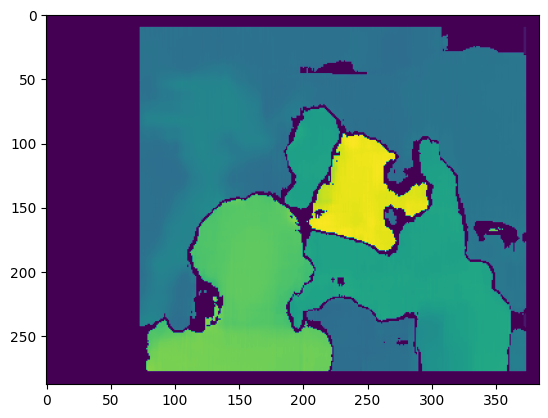

In [13]:
plt.imshow(depth)

In [15]:
# Example_2
left_image = cv2.imread('./images/items_l.png', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('./images/items_r.png', cv2.IMREAD_GRAYSCALE)

In [16]:
depth = stereo.compute(left_image, right_image)
print(depth)

[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


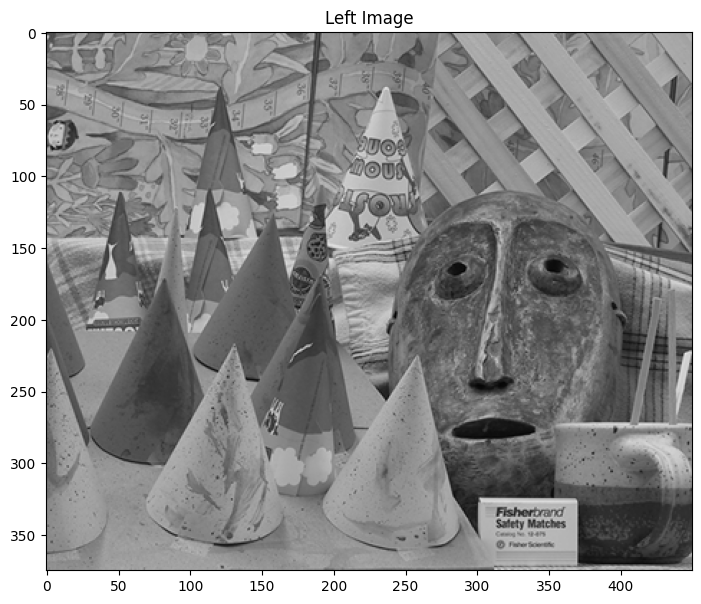

In [17]:
imshow('Left Image',left_image)

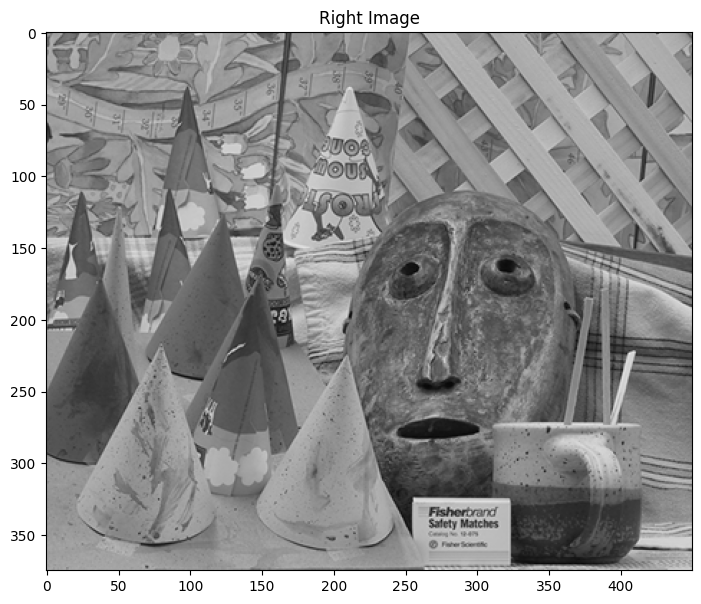

In [18]:
imshow('Right Image',right_image)

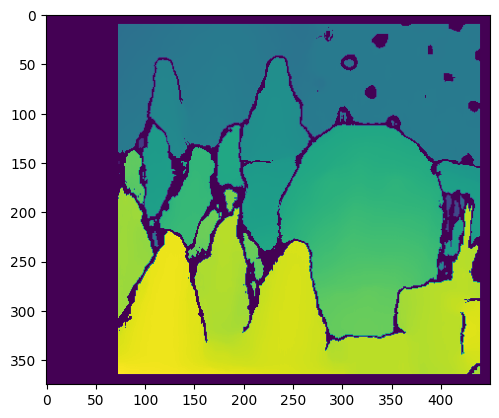

In [19]:
plt.imshow(depth)

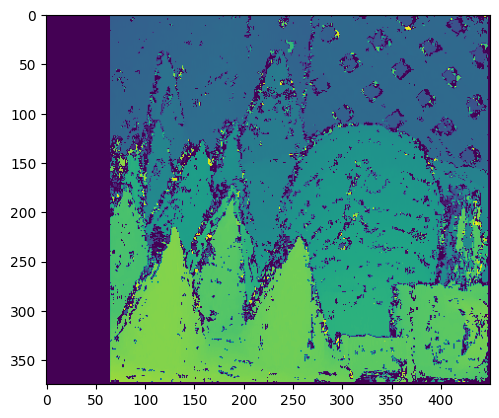

In [26]:
#Class for computing stereo correspondence using the block matching algorithm
stereo = cv2.StereoBM_create(numDisparities=0, blockSize=5)
depth = stereo.compute(left_image, right_image)
plt.imshow(depth)

## What determines the depth range in Stereo Vision? 
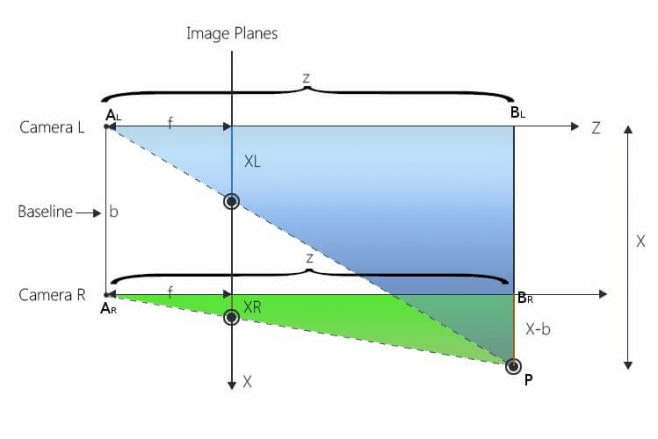

**The properties to determine the distance of the depth: **

- Baseline:
The distance between the two cameras is called baseline, for human eyes, it is about 50-75 mm interpupillary distance) depending on each individual.
The Baseline is directly proportional to the Depth. So, the longer Baseline the longer the depth we can cover with better accuracy.

- Resolution:
The Resolution of the two cameras and it is directly proportional to the Depth. 
Higher the number of pixels to search, higher the number of disparity levels. So, at higher resolutions, the disparty levels will be high but with a higher computational load.

- Focal Length:
The Focal Lenght of the lens and it's directly proportional to the Depth. 
Lower the focal lens the farther we see, but with reduced field of view. 

This calculator helps you selecting the right lenses for your cameras:
https://nerian.com/support/calculator/